<a href="https://colab.research.google.com/github/nahumsa/Self-Avoiding-Walks/blob/master/Monte%20Carlo%20Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration

In Monte Carlo Integration we sample from an interval $\{a,b\}$ and see if it is inside the region between the function and the x axis, if this condition is satisfied we accept the sample, otherwise we discart the sample.

Consider that you want to estimate the following integral:

$$
\int_a^b f(x) dx
$$

The procedure can be summarized as follows: 

- 1) Draw a uniform sample from the interval $x \sim \{a,b\}$ and a uniform sample from $y \sim \{0, \max (f(\{a,b\})\}$. ;

- 2) Evaluate f(x) and if $f(x) > y$ discart the sample, otherwise accept the sample.

On average you will have the number of samples that satisfies your constraints, then you take the average and multiply for the area of your given interval:

$$
A = (\max (f(\{a,b\})\} - 0)*(b-a)
$$

Thus:

$$
\int_a^b f(x) dx = A* \mathbb{E}(\mathrm{Accepted \ counts})
$$


Reference: [link](http://barnesanalytics.com/monte-carlo-integration-in-python)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
def f(x):
  return np.sin(x)

In [58]:
def mc_integration(x_init, x_final, func, n=100000):
  """ Function to do monte carlo integration for 
      n samples.

  Parameters
  -----------------------------------------------
  x_init(float): Starting point of integration.
  x_final(float): Ending point of integration.
  func(function): Python function that you want to integrate.
  n(int): Number of samples.

  """

  X = np.linspace(x_init, x_final, 1000)
  y1 = 0
  # Overshoot by 1 for convergence
  y2 = max((func(X))) + 1
      
  area = (x_final-x_init)*(y2-y1)
  check = []
  xs = []
  ys = []

  for _ in range(n):
      
      # Generate Samples
      x = np.random.uniform(x_init,x_final,1)
      xs.append(float(x))
      
      y = np.random.uniform(y1,y2,1)
      ys.append(float(y))
      
      # Reject
      if abs(y) > abs(func(x)) or y<0:
          check.append(0)
      
      # Accept
      else:
          check.append(1)

  return np.mean(check)*area, xs, ys, check

In [59]:
from scipy.integrate import quad

a = 0.3
b = 2.5

sol, xs, ys, check = mc_integration(a, b, f)
id_sol, _ = quad(f, a, b)

print(f'Monte Carlo Solution: {sol}')
print(f'Quad Solution: {id_sol}')
print(f'Error: {np.square(sol - id_sol)}')

Monte Carlo Solution: 1.758591993058195
Quad Solution: 1.7564801046725398
Error: 4.46007255346548e-06


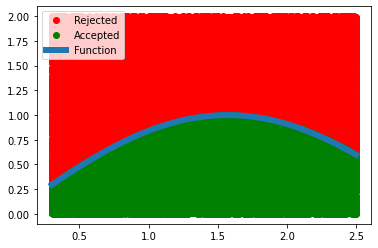

In [60]:
check = np.array(check)
xs = np.array(xs)
ys = np.array(ys)
plt.plot(xs[check == 0], ys[check == 0], 'ro', label='Rejected')
plt.plot(xs[check == 1], ys[check == 1], 'go', label='Accepted')
x = np.linspace(a,b, 100000)
plt.plot(x, f(x), label='Function', linewidth=6)
plt.legend()
plt.show()